# Analisis de los resultados de K-Medias

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/results_variation.csv')

### Analyze the genres distribution of the classes

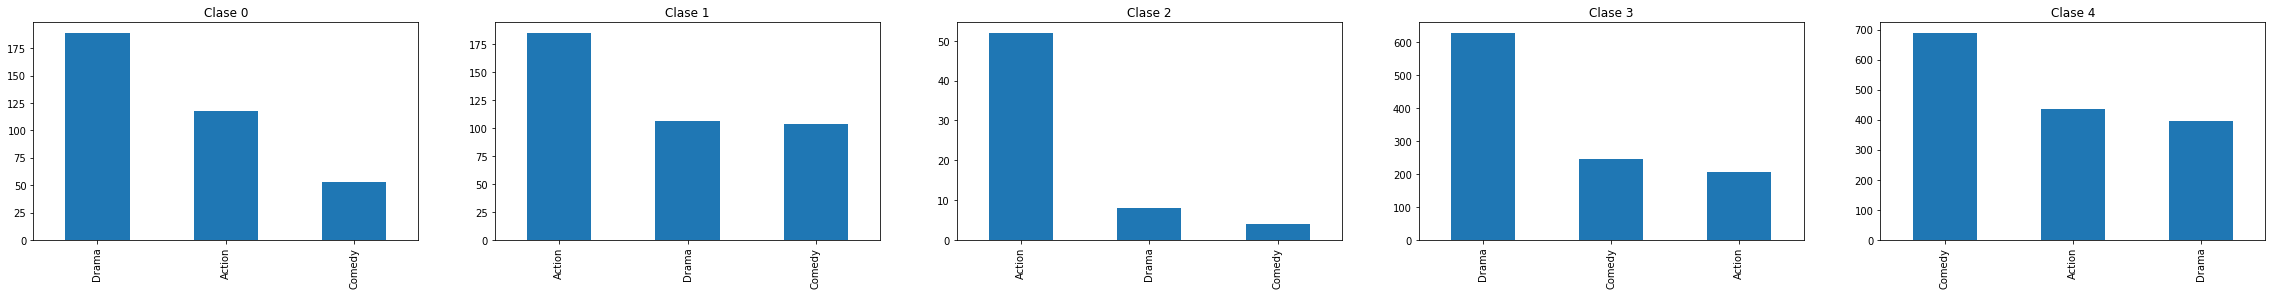

In [59]:
classes = df['class'].unique()
fig, axes = plt.subplots(nrows=1, ncols=len(classes), figsize=(40, 4))

for group, data in df.groupby('class'):
    data['genres'].value_counts().plot(kind='bar', ax=axes[group], title="Clase "+str(group))


## Accuracy of the model based on genres

In [71]:
correct = 0
modes = {}
for group, data in df.groupby('class'):
    mode = data['genres'].mode()[0]
    if mode not in modes:
        modes[mode] = []
    modes[mode].append(group)
    print("Mode for class", group, ":", mode)
    correct += data['genres'].value_counts()[mode]
print("Total accuracy:", correct/len(df))

for group, data in df.groupby('genres'):
    total = len(data)
    correct = 0
    for c in modes[group]:
        correct += data[data['class'] == c]['genres'].value_counts()[group]
    print("Genre", group, "correct:", correct, "total:", total, "accuracy:", round(correct/total * 100, 2), "%")

        

Mode for class 0 : Drama
Mode for class 1 : Action
Mode for class 2 : Action
Mode for class 3 : Drama
Mode for class 4 : Comedy
Total accuracy: 0.5096491228070176
Genre Action correct: 237 total: 997 accuracy: 23.77 %
Genre Comedy correct: 689 total: 1095 accuracy: 62.92 %
Genre Drama correct: 817 total: 1328 accuracy: 61.52 %
